Created: 07 June 2022

version: 2

notes: use pandas dataframe to load files info from xls spreadsheet

### set up environment and functions

Let's import some useful stuff first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

import librosa
import librosa.display
import IPython.display as ipd

import os

### Dataframes

#### All files in one dataframe

read xls file with info on all audio files into a database.

In [2]:
# the root directory of the all audio recordings
data_root_dir = '/Users/emmanouela/Documents/animal_behaviour_research/acoustics/mimicry/honeyguides/data/recordings'

In [3]:
#location of xls file
xls_file = '/Users/emmanouela/Documents/animal_behaviour_research/acoustics/mimicry/honeyguides/data/recordings_emmanouela.xlsx'

# read xls in pandas dataframe
df_all = pd.read_excel(xls_file)

#take a look at header and 10 first entries of dataframe
df_all.head(10) 

file_name                species  individuals  \
0         LT07 two barbets 17102009  Black-collared Barbet            2   
1           LT12 4 barbets 31202009  Black-collared Barbet            4   
2        LT38 four barbets 15112010  Black-collared Barbet            4   
3                       111113_0028  Black-collared Barbet            1   
4    LT35_barbethatchling_05112011a  Black-collared Barbet            1   
5    LT35_barbethatchling_05112011b  Black-collared Barbet            1   
6    LT43_barbethatchlingA_11112011  Black-collared Barbet            1   
7   LT43_barbethatchlingB_11112011a  Black-collared Barbet            1   
8   LT43_barbethatchlingB_11112011b  Black-collared Barbet            1   
9  LT15 honeyguide begging 28102009      Lesser Honeyguide            1   

  chick stage              type  
0     stage 4       host1_brood  
1         NaN       host1_brood  
2     stage 4       host1_brood  
3     stage 1      host1_single  
4     stage 1      host1_single  
5     stage 1      host1_single  
6     stage 1      host1_single  
7     stage 1      host1_single  
8     stage 1      host1_single  
9     stage 4  parasite1_single

#### Renove spaces from names of original audio files

<div class="mark">
**This step only needs to be done once for each set of recording files; and if necessary only**

We will rename the audio files to remove spaces and replace them with underscores. We can then adjust the file name entries accordingly in the dataframe (xls file remains as is)</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
for file in df_all['file_name']:
    old_name=os.path.join(data_root_dir,df_all.loc[df_all['file_name'] == file, 'type'].item(),file+'.wav')
    new_name=os.path.join(data_root_dir,df_all.loc[df_all['file_name'] == file, 'type'].item(),file.replace(' ', '_')+'.wav')
    #print(old_name)
    #print(new_name)
    if os.path.exists(old_name):    
        os.rename(old_name,new_name)
        print(new_name)

#### Correct filenames in dataframe

__now lets correct the filename entries in the dataframe so that they also do not have spaces and they correspond to the renames files__


In [4]:
df_all['file_name'] = df_all['file_name'].str.replace(' ','_')
df_all.head(10)

file_name                species  individuals  \
0         LT07_two_barbets_17102009  Black-collared Barbet            2   
1           LT12_4_barbets_31202009  Black-collared Barbet            4   
2        LT38_four_barbets_15112010  Black-collared Barbet            4   
3                       111113_0028  Black-collared Barbet            1   
4    LT35_barbethatchling_05112011a  Black-collared Barbet            1   
5    LT35_barbethatchling_05112011b  Black-collared Barbet            1   
6    LT43_barbethatchlingA_11112011  Black-collared Barbet            1   
7   LT43_barbethatchlingB_11112011a  Black-collared Barbet            1   
8   LT43_barbethatchlingB_11112011b  Black-collared Barbet            1   
9  LT15_honeyguide_begging_28102009      Lesser Honeyguide            1   

  chick stage              type  
0     stage 4       host1_brood  
1         NaN       host1_brood  
2     stage 4       host1_brood  
3     stage 1      host1_single  
4     stage 1      host1_single  
5     stage 1      host1_single  
6     stage 1      host1_single  
7     stage 1      host1_single  
8     stage 1      host1_single  
9     stage 4  parasite1_single

#### Find duration of each audio file in main dataframe

In [ ]:
for file in df_all['file_name']:
    audio=os.path.join(data_root_dir,df_all.loc[df_all['file_name']==file,'type'].item(),file+'.wav')
    signal,sr=librosa.load(audio)
    print(f'total audio duration of file {file} is : {len(signal)/sr:.2f}s')


#### create separate  dataframes for each type of calls

In [5]:
# let's see how many unique 'types' we have in the main dataframe
print(df_all.type.unique())

['host1_brood' 'host1_single' 'parasite1_single' 'host2_brood'
 'host2_single' 'parasite2_single']


In [6]:
# create one dataframe for each 'type' of calls and check how many files we have in each of the new dataframes

for call_type in df_all.type.unique():
    vars()['df_'+call_type] = df_all[df_all['type']== call_type]
    print('there are {} audio files in the {} category'.format(len(vars()['df_'+call_type]),call_type))

there are 3 audio files in the host1_brood category
there are 6 audio files in the host1_single category
there are 11 audio files in the parasite1_single category
there are 10 audio files in the host2_brood category
there are 17 audio files in the host2_single category
there are 37 audio files in the parasite2_single category


### Plot audiowaves

<div class="girk">
uncomment line 
    
    ipd.display(ipd.Audio(data=audio,rate=sr)) 
    
if you also want an audio player for each file.
This however is very memory expensive when done for many files. Use with caution!!</div><i class="fa fa-lightbulb-o "></i>

In [7]:
def plot_audiowaves(df,n_waves,start_index,c_map='nipy_spectral'):
    color_map= plt.get_cmap(c_map)
    colors = iter(color_map(np.linspace(0,1,n_waves+1)))
    for file in df['file_name'][start_index:start_index+n_waves]:
        call_type = df.loc[df['file_name']==file,'type'].item()
        stage = df.loc[df['file_name']==file,'chick stage'].item()
        if str(stage)=='nan':
            stage='stage unknown'
        audio=os.path.join(data_root_dir,call_type,file+'.wav')
        signal,sr=librosa.load(audio)
        #ipd.display(ipd.Audio(data=audio,rate=sr))
        plt.figure(figsize=(8,5))
        librosa.display.waveshow(signal, sr=sr,alpha=0.4,color=next(colors))
        plt.title(file + '   ' +  call_type + '    ' + str(stage))
        plt.show()
        print('\n')  
    return    

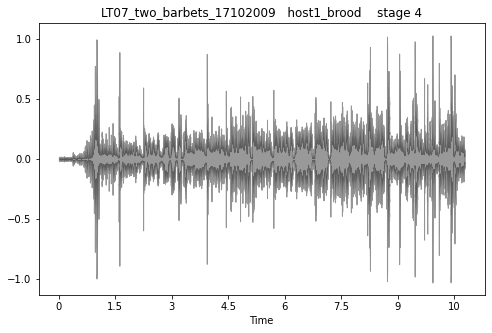

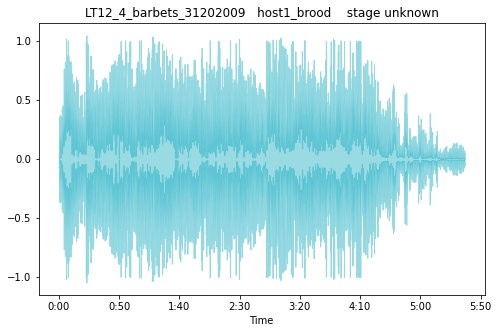

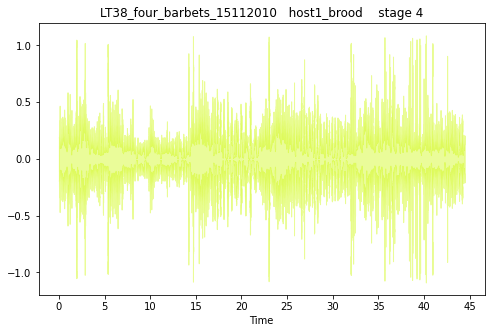

In [14]:
plot_audiowaves(df_host1_brood,len(df_host1_brood),0)

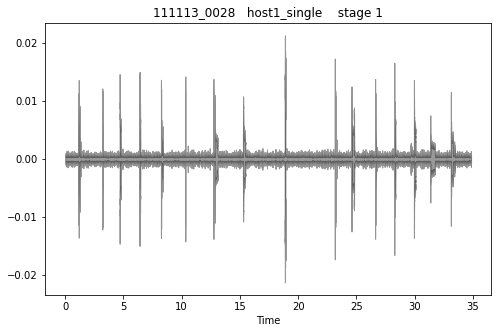

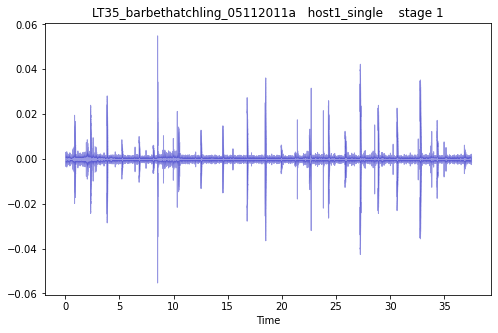

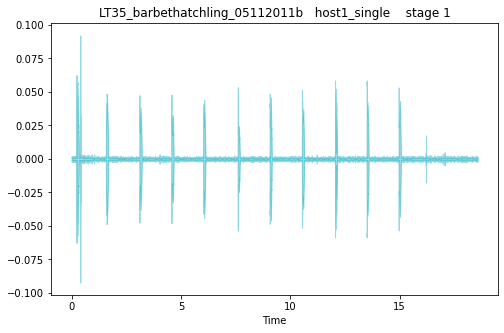

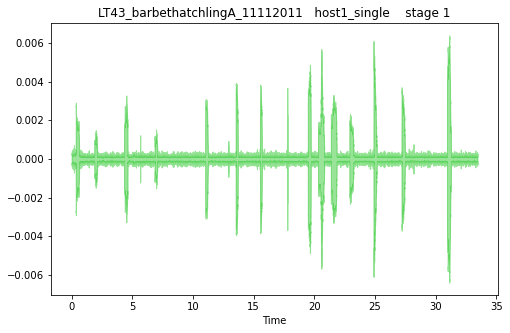

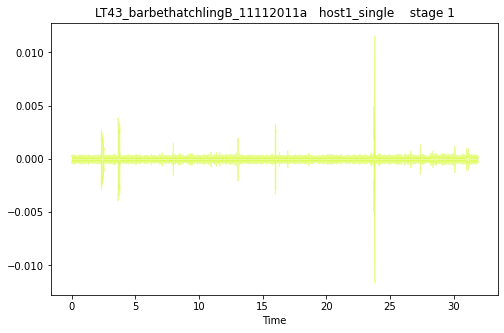

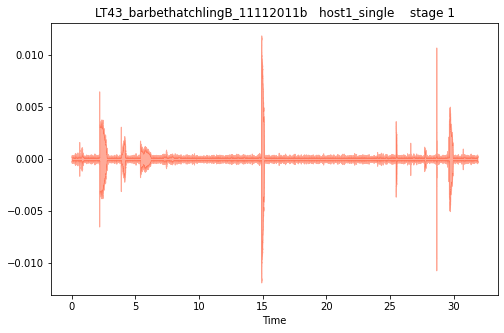

In [9]:
plot_audiowaves(df_host1_single,len(df_host1_single),0)

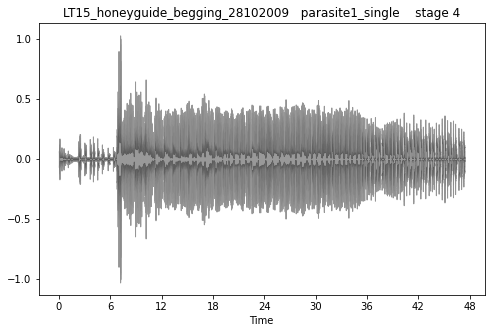

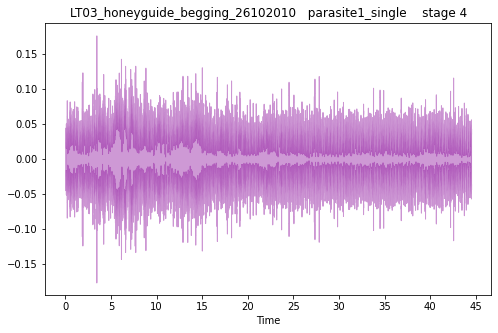

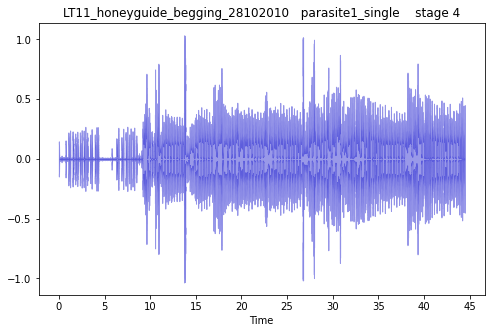

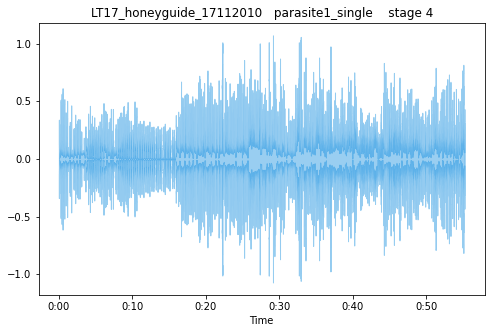

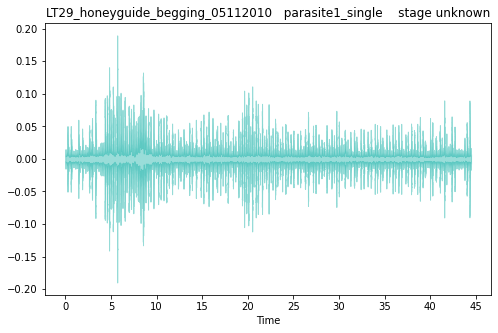

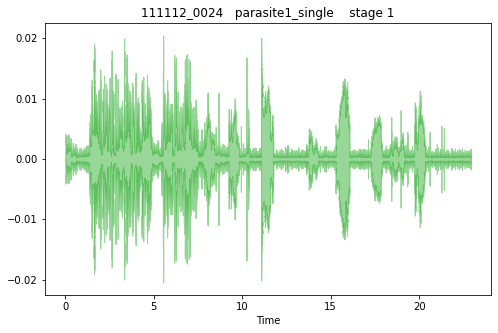

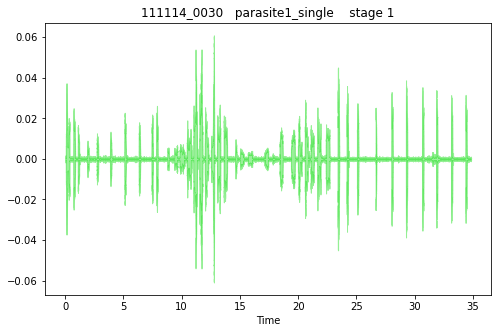

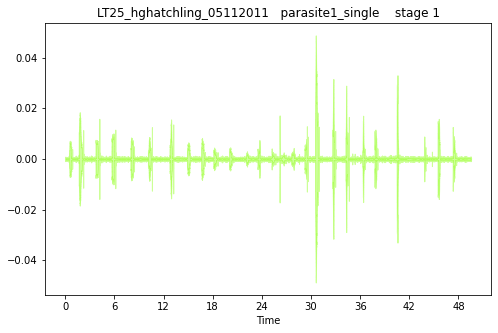

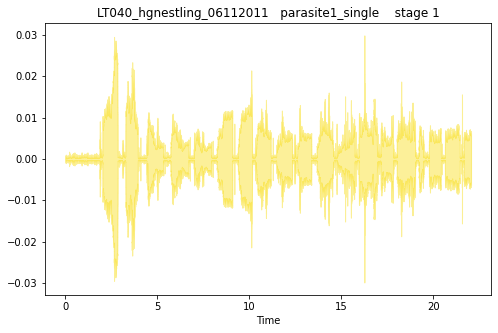

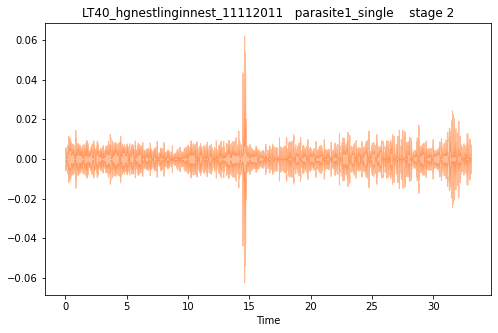

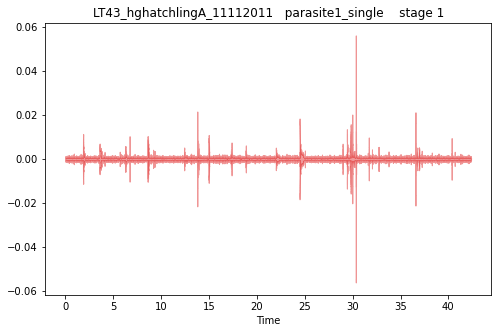

In [15]:
plot_audiowaves(df_parasite1_single,len(df_parasite1_single),0)

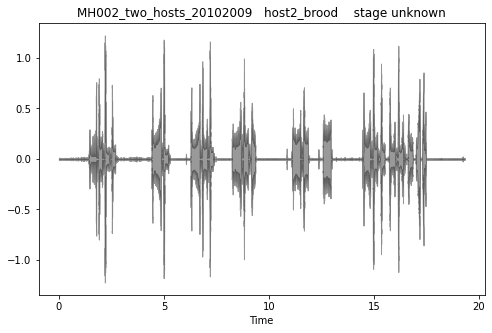

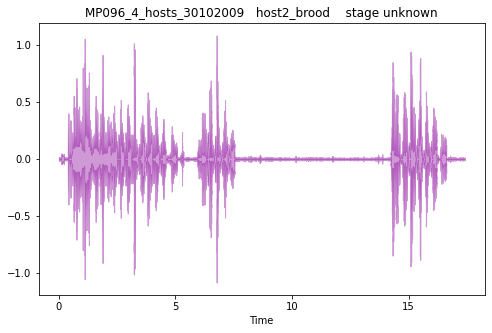

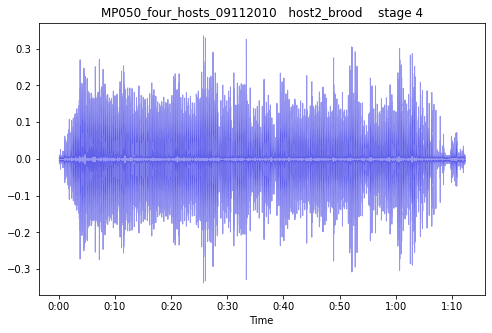

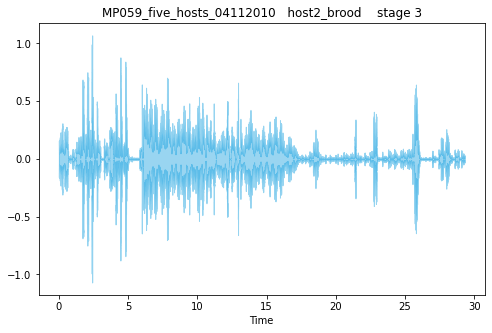

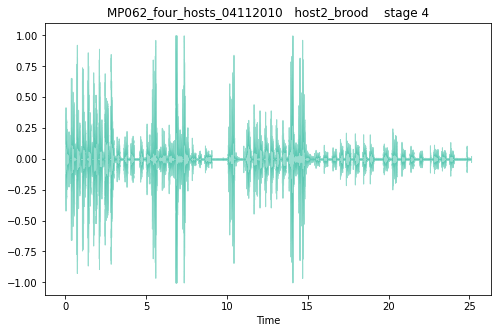

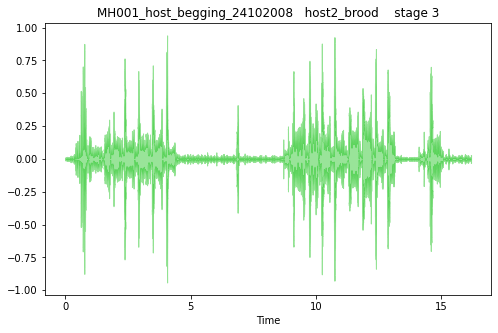

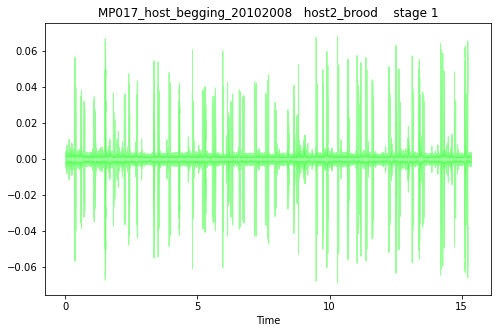

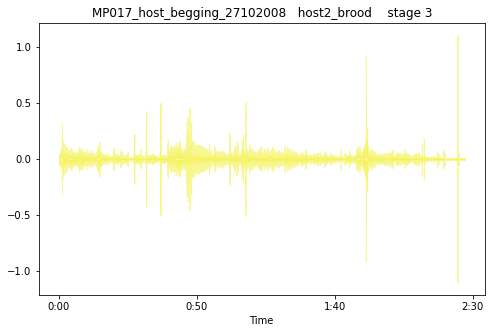

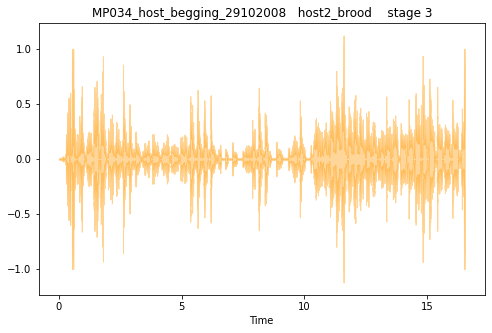

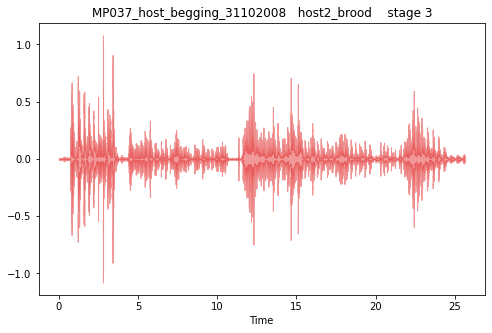

In [11]:
plot_audiowaves(df_host2_brood,len(df_host2_brood),0)

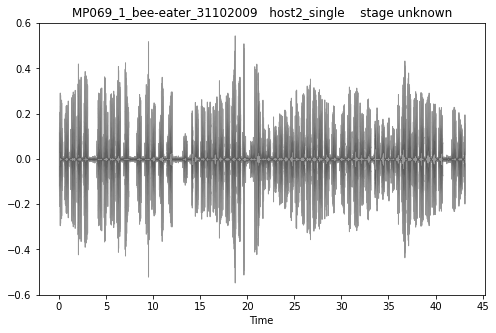

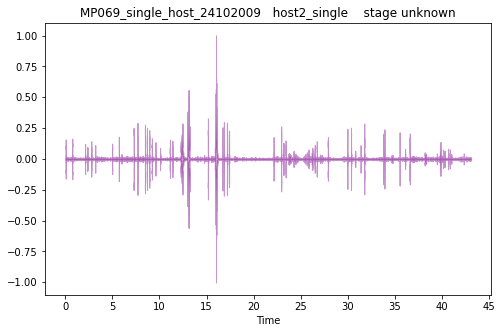

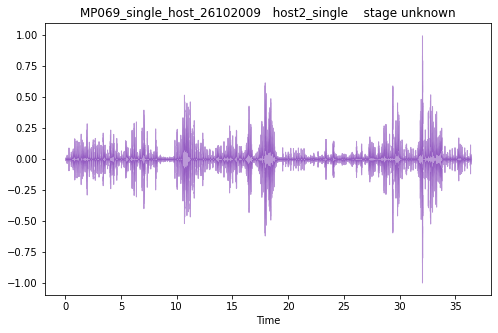

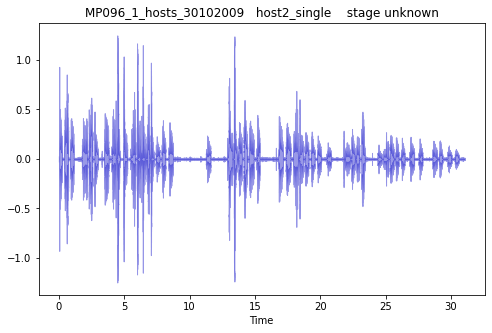

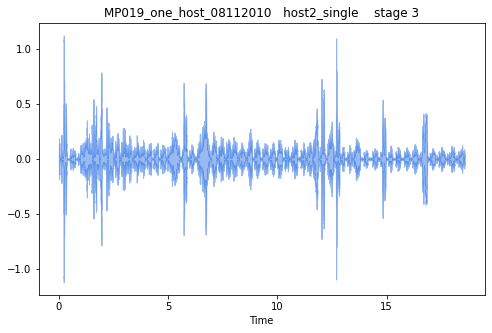

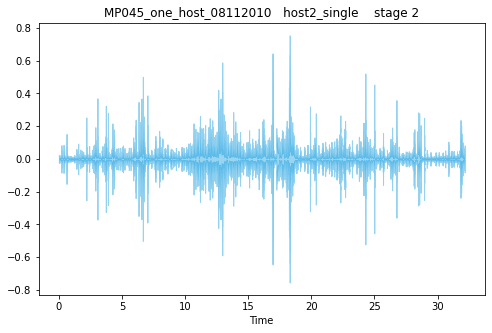

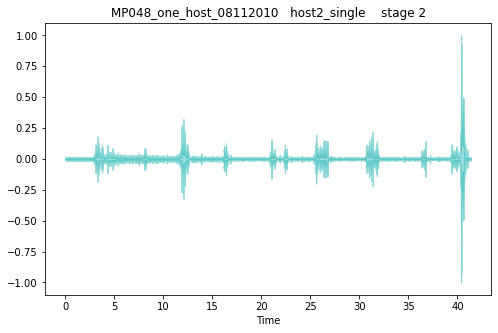

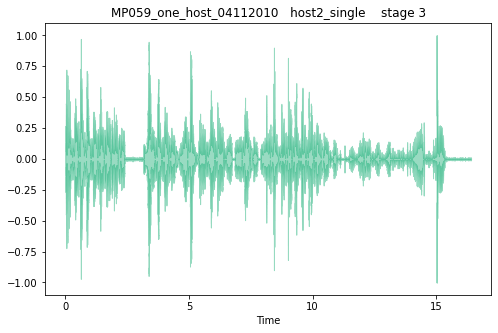

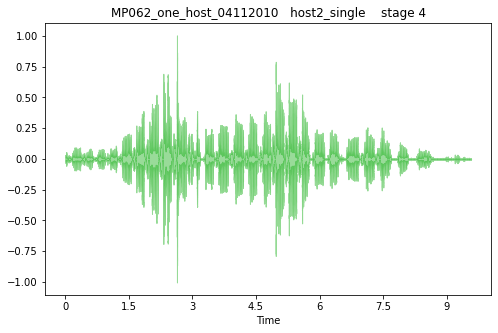

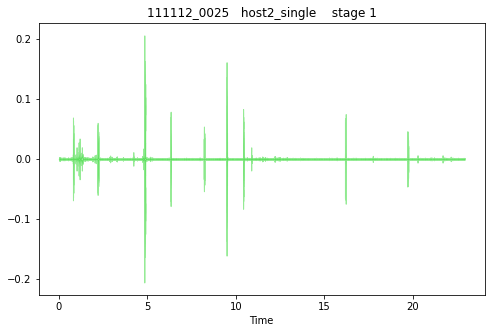

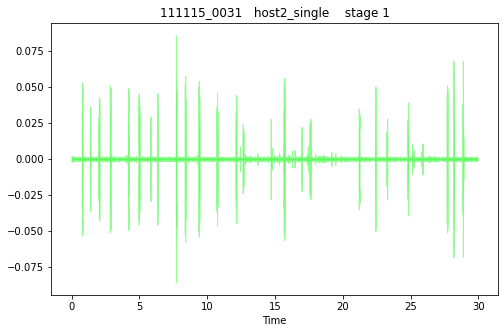

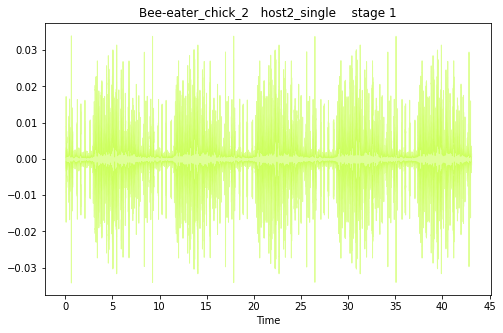

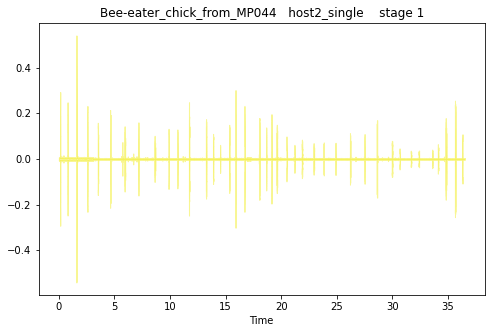

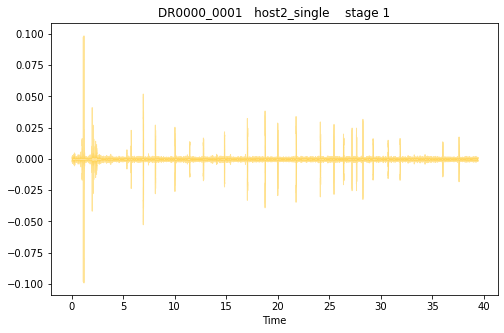

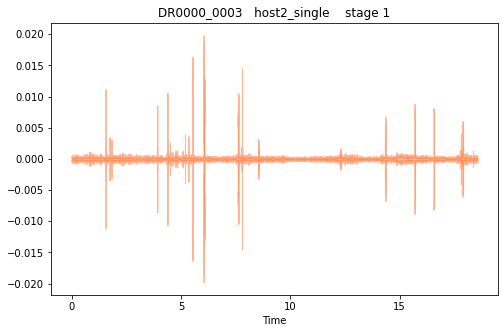

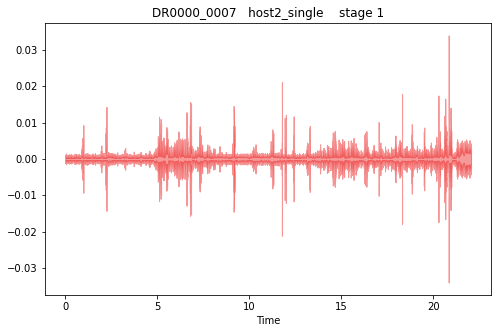

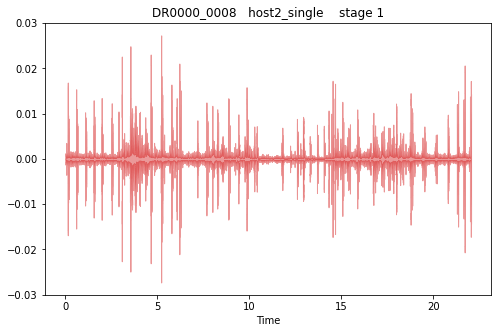

In [12]:
plot_audiowaves(df_host2_single,len(df_host2_single),0)

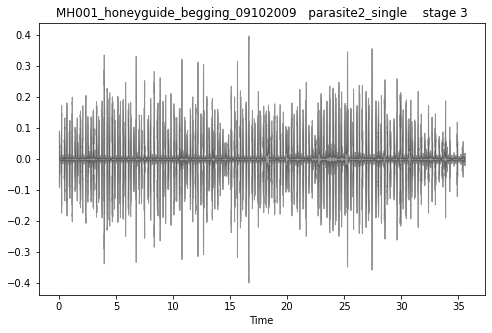

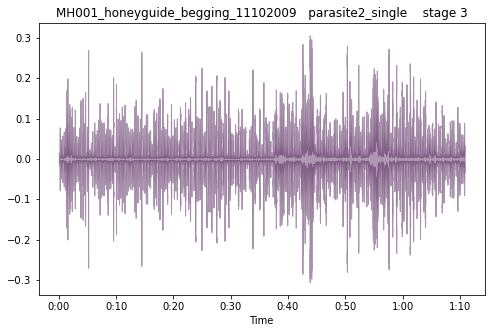

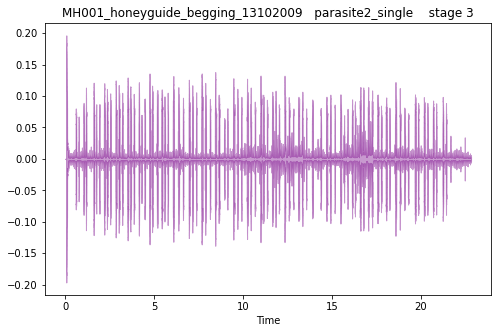

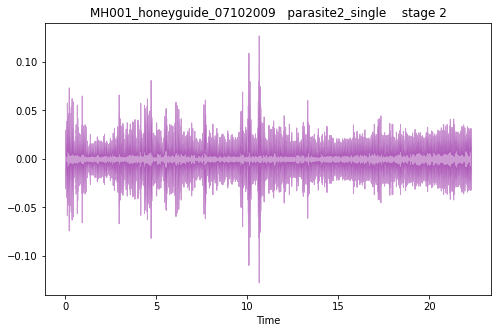

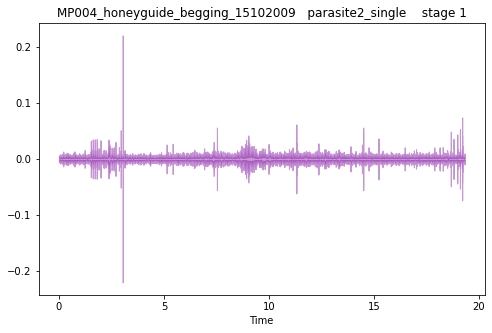

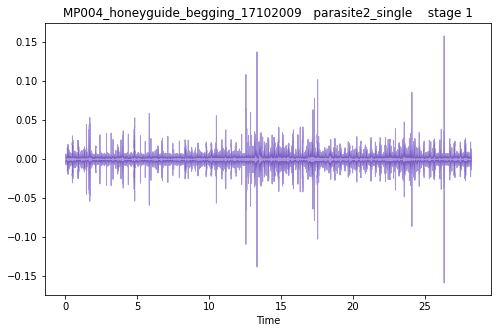

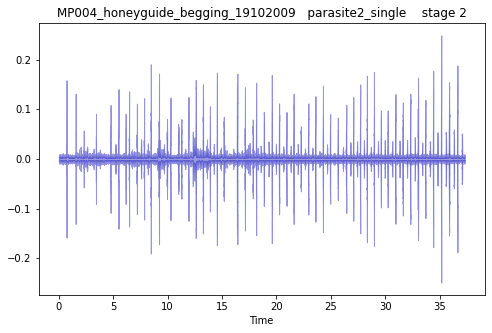

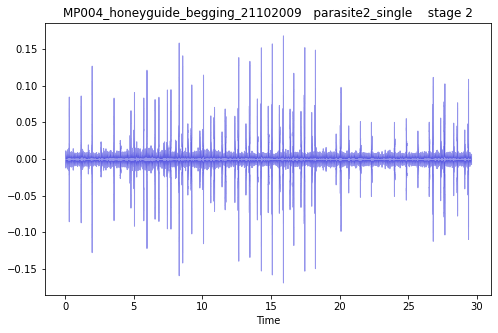

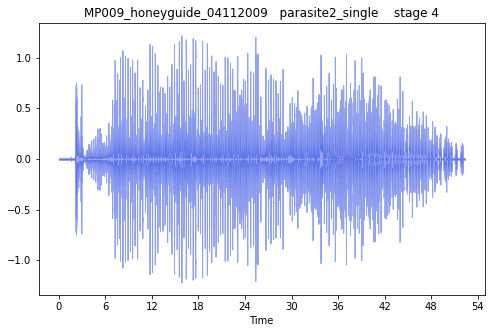

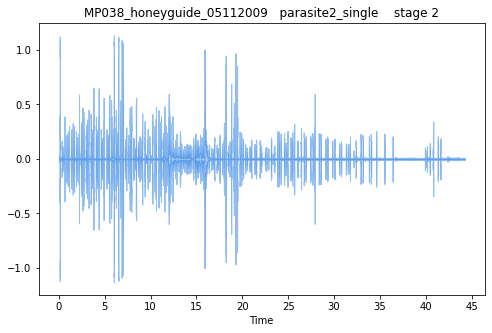

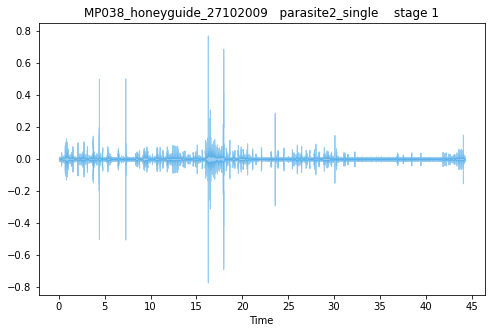

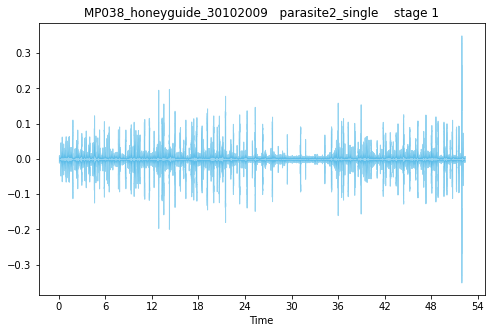

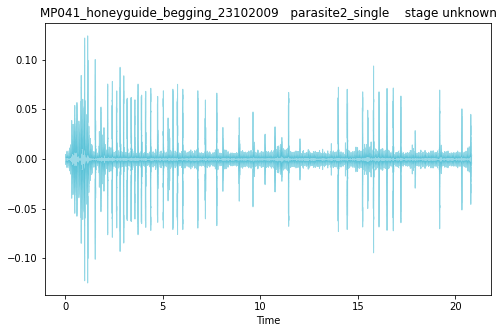

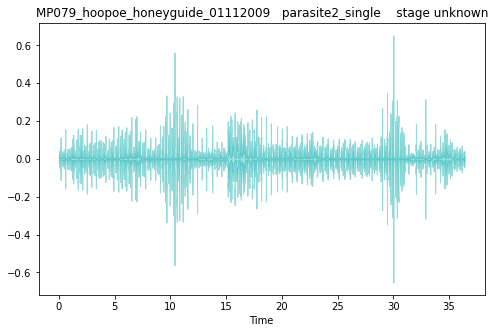

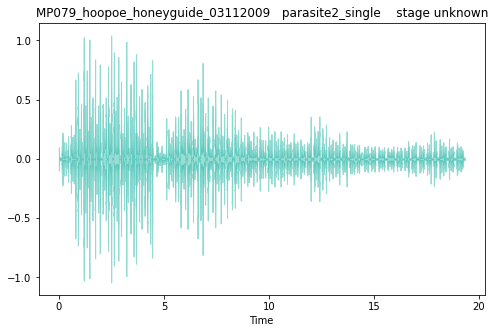

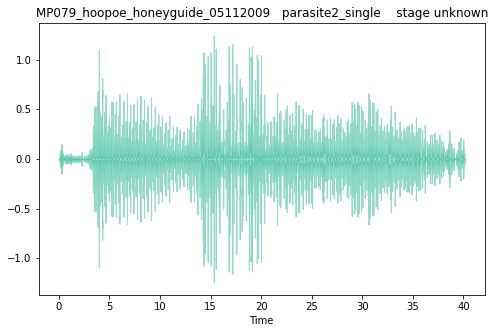

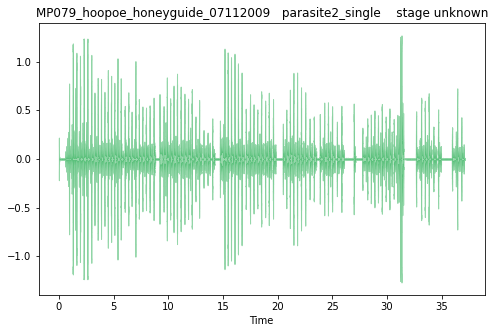

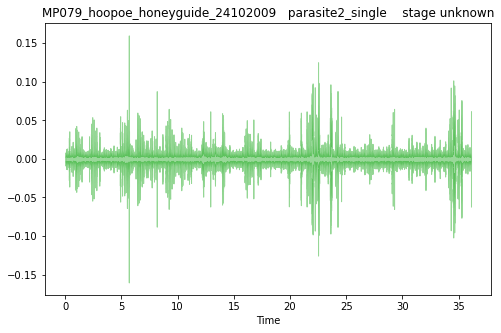

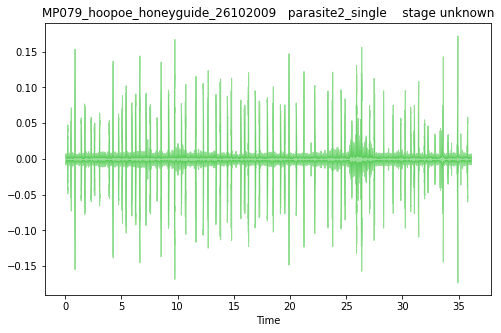

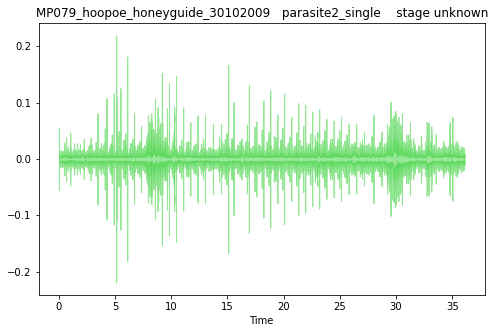

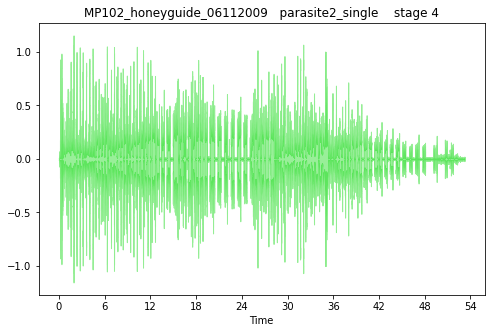

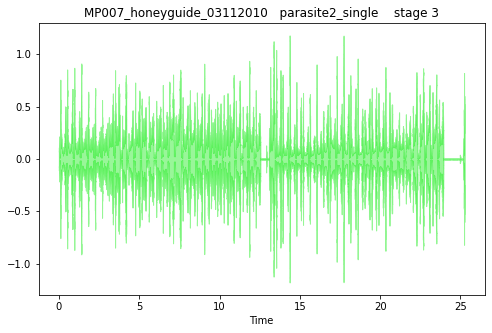

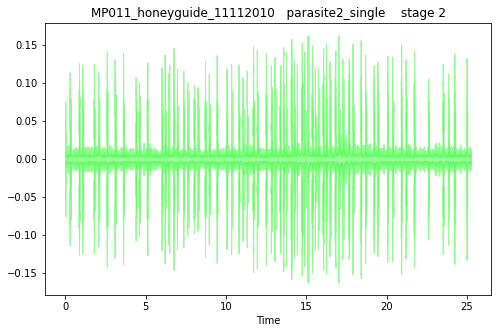

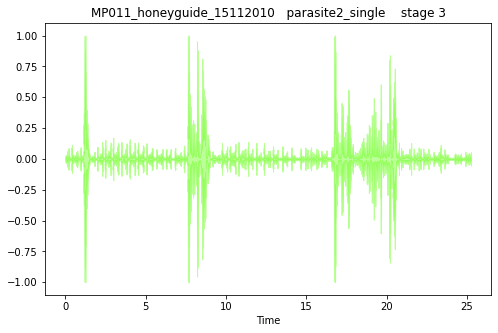

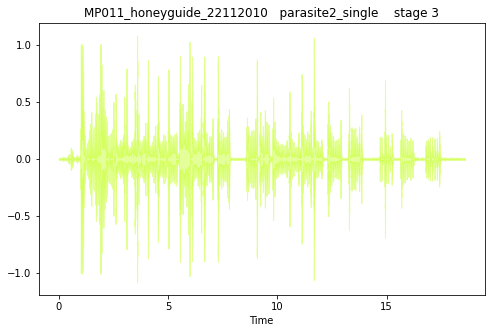

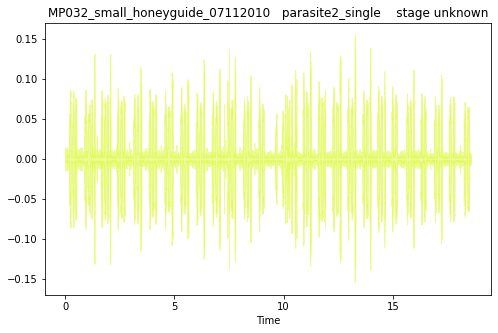

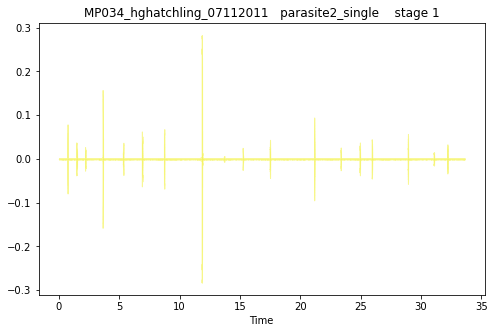

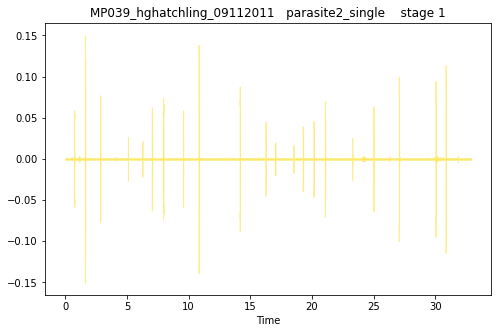

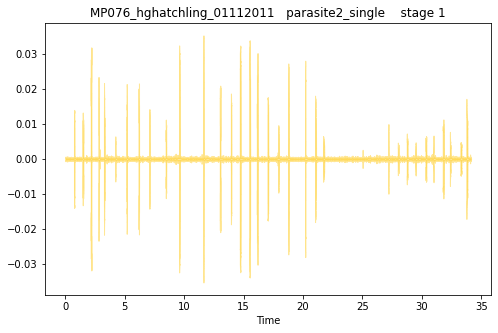

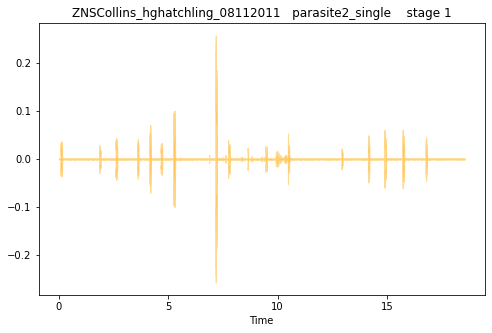

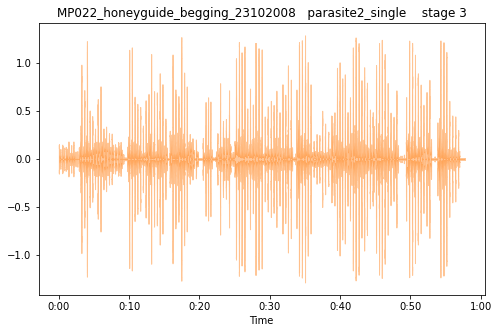

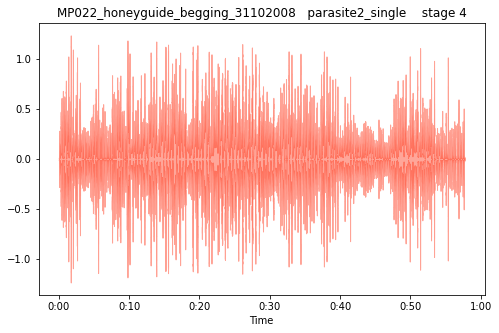

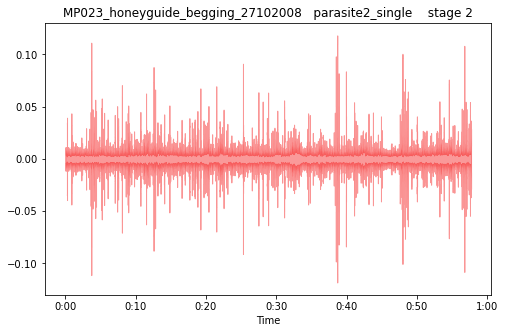

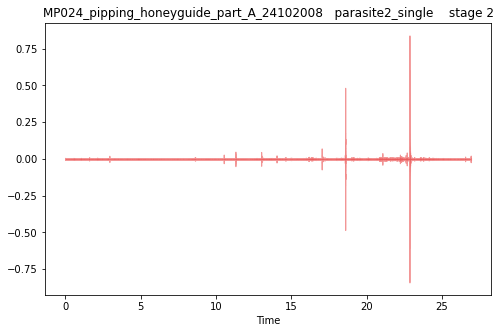

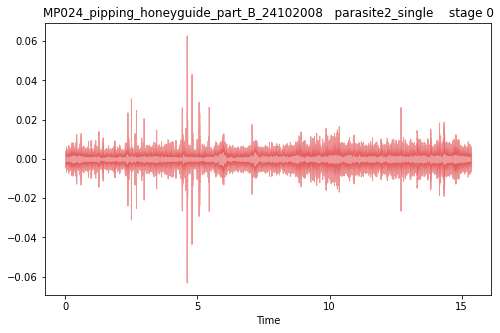

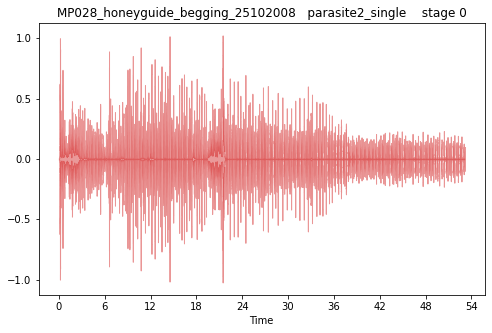

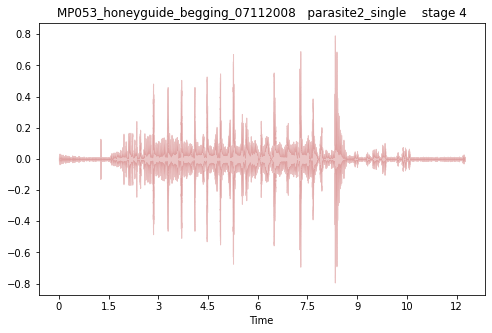

In [13]:
plot_audiowaves(df_parasite2_single,len(df_parasite2_single),0)

### Amplitude Envelope

In [ ]:
frame_size = 512
hop_length = 256

In [ ]:
def amplitude_envelope(signal,frame_size,hop_length):
    amp_env = np.array([max(signal[i:i+frame_size]) for i in range(0,len(signal),hop_length)])
    return amp_env


In [18]:
# host2_brood, 4 x stage-4 chicks
file = df_host2_brood[df_host2_brood['chick stage']=='stage 4'].iloc[0]['file_name']
signal,sr_h2b_s4_4=librosa.load(os.path.join(data_root_dir,df_host2_brood.iloc[0]['type'],file+'.wav'))
signal_h2b_s4_4 = signal[sr_h2b_s4_4*10:sr_h2b_s4_4*18]

In [ ]:
amp_env_h2b_s4_4 = amplitude_envelope(signal_h2b_s4_4,frame_size,hop_length)
n_frames=range(len(amp_env_h2b_s4_4))
time=librosa.frames_to_time(n_frames,hop_length=hop_length)

plt.figure(figsize=(18,8))
plt.plot(time,amp_env_h2b_s4_4)
plt.title(file + '  //  ' + df_host2_brood.iloc[0]['type'])
plt.show()

In [19]:
# host2_single, 1 x stage-4 chicks
file = df_host2_single[df_host2_single['chick stage']=='stage 4'].iloc[0]['file_name']
signal,sr_h2s_s4=librosa.load(os.path.join(data_root_dir,df_host2_single.iloc[0]['type'],file+'.wav'))
signal_h2s_s4 = signal[0:sr_h2s_s4*8]

In [ ]:
amp_env_h2s_s4 = amplitude_envelope(signal_h2s_s4,frame_size,hop_length)
n_frames=range(len(amp_env_h2s_s4))
time=librosa.frames_to_time(n_frames,hop_length=hop_length)

plt.figure(figsize=(18,8))
plt.plot(time,amp_env_h2s_s4)
plt.title(file + '  //  ' + df_host2_single.iloc[0]['type'])
plt.show()

In [20]:
# parasite2_single, 1 x stage-4 chicks
file = df_parasite2_single[df_parasite2_single['chick stage']=='stage 4'].iloc[0]['file_name']
signal,sr_p2s_s4=librosa.load(os.path.join(data_root_dir,df_parasite2_single.iloc[0]['type'],file+'.wav'))
signal_p2s_s4 = signal[sr_p2s_s4*10:sr_p2s_s4*18]

In [ ]:
amp_env_p2s_s4 = amplitude_envelope(signal_p2s_s4,frame_size,hop_length)
n_frames=range(len(amp_env_p2s_s4))
time=librosa.frames_to_time(n_frames,hop_length=hop_length)

plt.figure(figsize=(18,8))
plt.plot(time,amp_env_p2s_s4)
plt.title(file + '  //  ' + df_parasite2_single.iloc[0]['type'])
plt.show()

### Zero crossing rate

In [ ]:
frame_size=2048
hop_size=512

In [ ]:
zcr_bbe_4 = librosa.feature.zero_crossing_rate(signal_bbe_4,frame_length=frame_size,hop_length=hop_size)[0]
zcr_bbe_5 = librosa.feature.zero_crossing_rate(signal_bbe_5,frame_length=frame_size,hop_length=hop_size)[0]

In [ ]:
t_bbe_4 = librosa.frames_to_time(range(len(zcr_bbe_4)),sr=sr_bbe_4, hop_length=hop_size)
t_bbe_5 = librosa.frames_to_time(range(len(zcr_bbe_5)),sr=sr_bbe_5,hop_length=hop_size)

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(t_bbe_4,zcr_bbe_4)
plt.plot(t_bbe_5,zcr_bbe_5,c='g')
plt.show()

In [ ]:
zcr_ghg_1 = librosa.feature.zero_crossing_rate(signal_ghg_1,frame_length=frame_size,hop_length=hop_size)[0]

In [ ]:
t_ghg_1 = librosa.frames_to_time(range(len(zcr_ghg_1)),sr=sr_ghg_1,hop_length=hop_size)

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(t_ghg_1,zcr_ghg_1,c='r')
plt.show()

### RMS Energy

In [ ]:
frame_size=2048
hop_size=512

In [ ]:
rmsE_bbe_4 = librosa.feature.rms(y=signal_bbe_4,frame_length=frame_size,hop_length=hop_size)[0]
rmsE_bbe_5 = librosa.feature.rms(y=signal_bbe_5,frame_length=frame_size,hop_length=hop_size)[0]

In [ ]:
t_bbe_4 = librosa.frames_to_time(range(len(rmsE_bbe_4)),hop_length=hop_size)
t_bbe_5 = librosa.frames_to_time(range(len(rmsE_bbe_5)),hop_length=hop_size)

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(t_bbe_4,rmsE_bbe_4)
plt.plot(t_bbe_5,rmsE_bbe_5,c='g')
plt.show()

In [ ]:
rmsE_ghg_1 = librosa.feature.rms(y=signal_ghg_1,frame_length=frame_size,hop_length=hop_size)[0]

In [ ]:
t_ghg_1 = librosa.frames_to_time(range(len(rmsE_ghg_1)),hop_length=hop_size)

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(t_ghg_1,rmsE_ghg_1,c='r')
plt.show()

### FFTs

In [25]:
def fft(signal):
    fft_signal=scipy.fft.fft(signal)
    return fft_signal

def plot_fft_abs(signal,sr,color='b'):
    fft_signal=fft(signal)
    fft_abs_signal=np.abs(fft_signal)
    freq = np.linspace(0, sr, len(fft_abs_signal)) 
    
    plt.figure(figsize=(18,8))

    plt.plot(freq[0:int(len(freq)/2)],fft_abs_signal[0:int(len(freq)/2)],c=color)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.ylim([0, 1000])
    plt.show()
    return

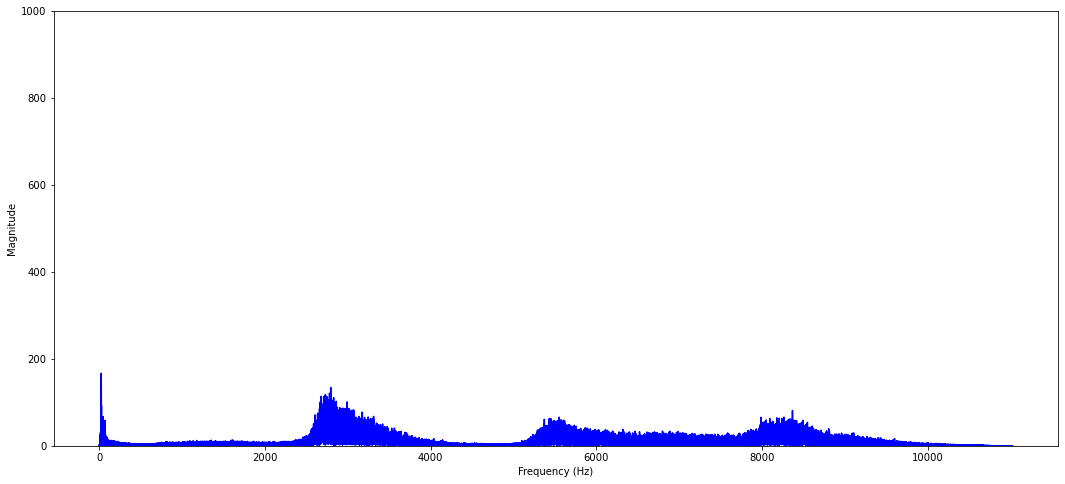

In [26]:
plot_fft_abs(signal_h2b_s4_4,sr_h2b_s4_4)

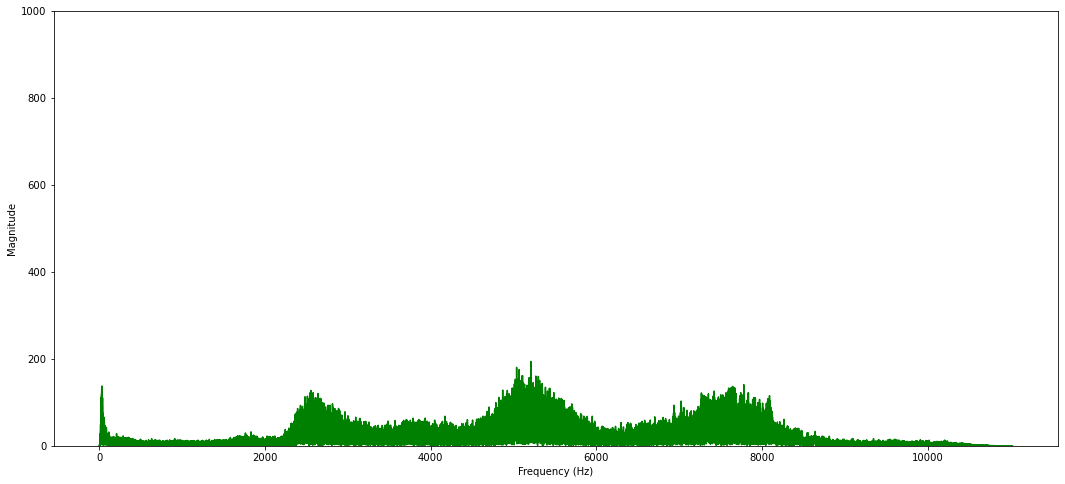

In [27]:
plot_fft_abs(signal_h2s_s4,sr_h2s_s4,'g')

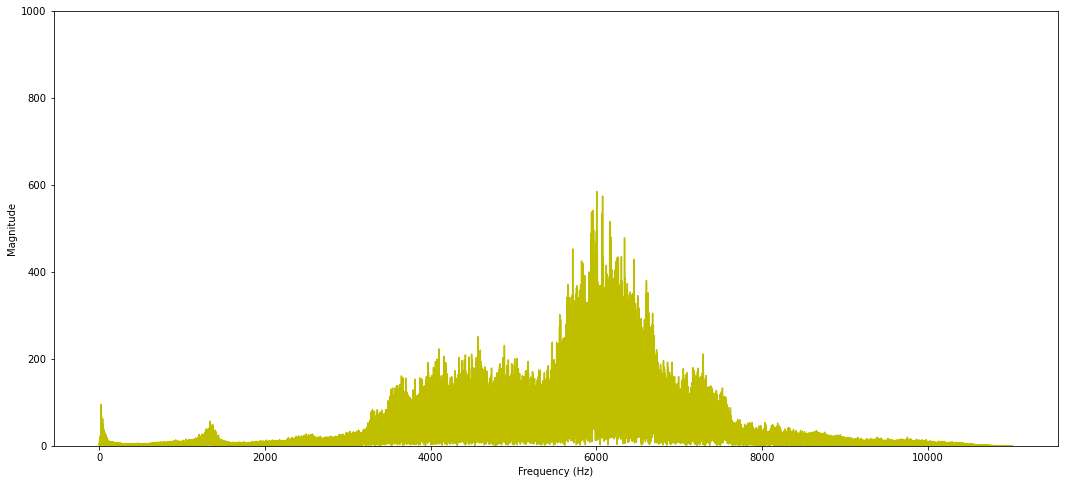

In [28]:
plot_fft_abs(signal_p2s_s4, sr_p2s_s4,'y')

### Cepstrum (kinda)

In [ ]:
def logspec(signal,sr):
    logfft = np.log(np.abs(fft(signal))) # get the log of the |fft|. Need the fft function for this from above
    freqs = np.linspace(0, sr, len(logfft))
    return logfft,freqs
        

def ae_logspec(logfft,freqs,sr,frame_size=2048,hop_size=2048):    
    ae_logfft = amplitude_envelope(logfft[0:int(len(freqs)/2)],frame_size=frame_size,hop_length=hop_size) # get the amplitude envelope of the logfft
    ae_freqs = np.linspace(0, sr/2, len(ae_logfft)) 
    return ae_logfft,ae_freqs

def smooth_ae(ae,ae_freqs,sr,smooth_factor=2):
    f1 = scipy.interpolate.UnivariateSpline(ae_freqs, ae,s=smooth_factor)
    new_ae_freqs = np.linspace(0, sr/2, 4*len(ae)) 
    return new_ae_freqs,f1(new_ae_freqs)



def plot_logspec(logspec,sr,frame_size,hop_size,sources,smoothing=2,plot_spec=True,plot_ae=True,plot_smooth_ae=True):
    plt.figure(figsize=(18,8))
    for signal,srate in zip(logspec,sr):
        logfft=signal[0]
        freqs=signal[1]
        if plot_spec:
            plt.plot(freqs[0:int(len(freqs)/2)],logfft[0:int(len(freqs)/2)])
        if plot_ae:
            ae = ae_logspec(logfft,freqs,srate,frame_size,hop_size)
            plt.plot(ae[1],ae[0])
        if plot_smooth_ae:
            ae = ae_logspec(logfft,freqs,srate,frame_size,hop_size)
            smooth = smooth_ae(ae[0],ae[1],sr=srate,smooth_factor=smoothing)
            plt.plot(smooth[0],smooth[1],lw=3)
    plt.legend(sources)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.show()
    
    return

In [ ]:
logspec_h2b_s4_4 = logspec(signal_h2b_s4_4,sr_h2b_s4_4)
logspec_h2s_s4 = logspec(signal_h2s_s4,sr_h2s_s4)
logspec_p2_s4 = logspec(signal_p2s_s4,sr_p2s_s4)

plot_logspec([logspec_h2b_s4_4,logspec_h2s_s4,logspec_p2_s4],[sr_h2b_s4_4,sr_h2s_s4,sr_p2s_s4],
         1024,1024, sources=['h2b_s4_4','h2s_s4','p2_s4'],smoothing=2,
         plot_spec=False,plot_ae=False,plot_smooth_ae=True)

### Mel Specs

In [ ]:
def mel_spec(signal,sr,fft_window,hop_size,n_mels):
    melspec=librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=fft_window, hop_length=hop_size, n_mels=n_mels)

    plt.figure(figsize=(18, 8))
    librosa.display.specshow(np.log(melspec), 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr,cmap='magma')
    plt.colorbar(format="%+2.f")
    plt.show()
    return melspec

In [ ]:
melspec_bbe_4=mel_spec(signal_bbe_4,sr_bbe_4,2048,512,12)

In [ ]:
melspec_bbe_5=mel_spec(signal_bbe_5,sr_bbe_5,2048,512,12)

In [ ]:
melspec_bbe_1=mel_spec(signal_bbe_1,sr_bbe_1,2048,512,12)

In [ ]:
melspec_ghg_1=mel_spec(signal_ghg_1,sr_ghg_1,2048,512,12)

### MFCCs, Delta - MFCCs, Delta^2 - MFCCs

In [ ]:
def mfccs(signal,sr,n=13):
    mfccs = librosa.feature.mfcc(y=signal, sr=sr,n_mfcc=n)
    plt.figure(figsize=(18, 8))
    librosa.display.specshow(mfccs, 
                         x_axis="time", 
                         sr=sr,
                            cmap='plasma')
    plt.colorbar(format="%+2.f")
    plt.show()
    return mfccs


def d_mfccs(mfcc,sr,n_order=1):
    dmfccs=librosa.feature.delta(mfcc,order=n_order)
    plt.figure(figsize=(18, 8))
    librosa.display.specshow(dmfccs, 
                         x_axis="time", 
                         sr=sr,
                            cmap='plasma')
    plt.colorbar(format="%+2.f")
    plt.show()
    return dmfccs

In [ ]:
mfccs_bbe_4 = mfccs(signal_bbe_4,sr=sr_bbe_4,n=13)
print(mfccs_bbe_4.shape)

dmfccs_bbe_4 = d_mfccs(mfccs_bbe_4,sr=sr_bbe_4)
print(dmfccs_bbe_4.shape)

d2mfccs_bbe_4 = d_mfccs(dmfccs_bbe_4,sr=sr_bbe_4,n_order=2)
print(d2mfccs_bbe_4.shape)


mfccs_bbe_4_features = np.concatenate((mfccs_bbe_4, dmfccs_bbe_4, d2mfccs_bbe_4))



In [ ]:
mfccs_bbe_5 = mfccs(signal_bbe_5,sr=sr_bbe_5,n=13)

dmfccs_bbe_5 = d_mfccs(mfccs_bbe_5,sr=sr_bbe_5)

d2mfccs_bbe_5 = d_mfccs(dmfccs_bbe_5,sr=sr_bbe_5,n_order=2)

In [ ]:
mfccs_bbe_1 = mfccs(signal_bbe_1,sr=sr_bbe_1,n=13)

dmfccs_bbe_1 = d_mfccs(mfccs_bbe_1,sr=sr_bbe_1)

d2mfccs_bbe_1 = d_mfccs(dmfccs_bbe_1,sr=sr_bbe_1,n_order=2)

In [ ]:
mfccs_ghg_1 = mfccs(signal_ghg_1,sr=sr_ghg_1,n=13)

dmfccs_ghg_1 = d_mfccs(mfccs_ghg_1,sr=sr_ghg_1)

d2mfccs_ghg_1 = d_mfccs(dmfccs_ghg_1,sr=sr_ghg_1,n_order=2)

### Spectrograms

In [21]:
def plot_stft(signal,sr, fft_window,hop_size,y_axis='log',colormap='jet'):
    stft=librosa.stft(signal,n_fft=fft_window, hop_length=hop_size)
    spec_power = np.abs(stft)**2
    p_to_db = librosa.power_to_db(spec_power)
    plt.figure(figsize=(18,8))
    librosa.display.specshow(p_to_db,sr=sr,hop_length=hop_size,x_axis='time',y_axis=y_axis,cmap=colormap)
    plt.colorbar(format="%+2.f dB")
    plt.show()
    return

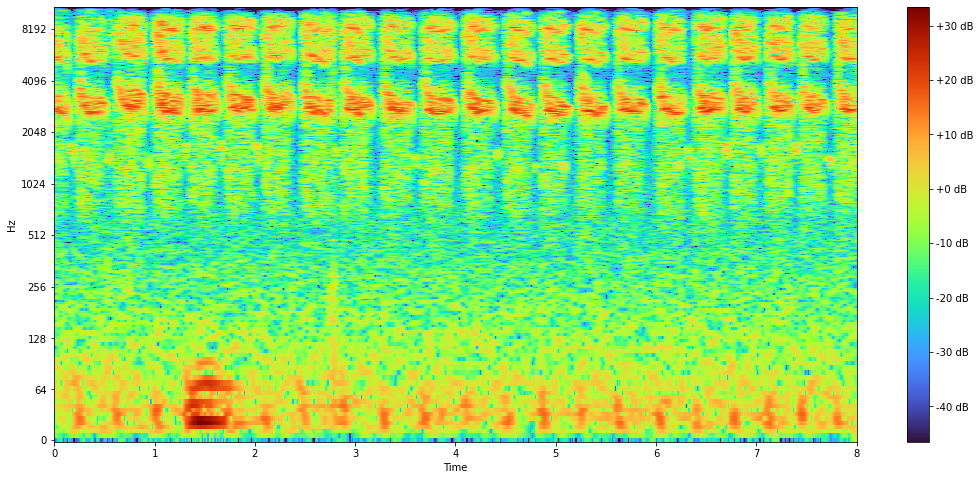

In [22]:
plot_stft(signal_h2b_s4_4,sr_h2b_s4_4,fft_window=4096,hop_size=256,y_axis='log',colormap='turbo')

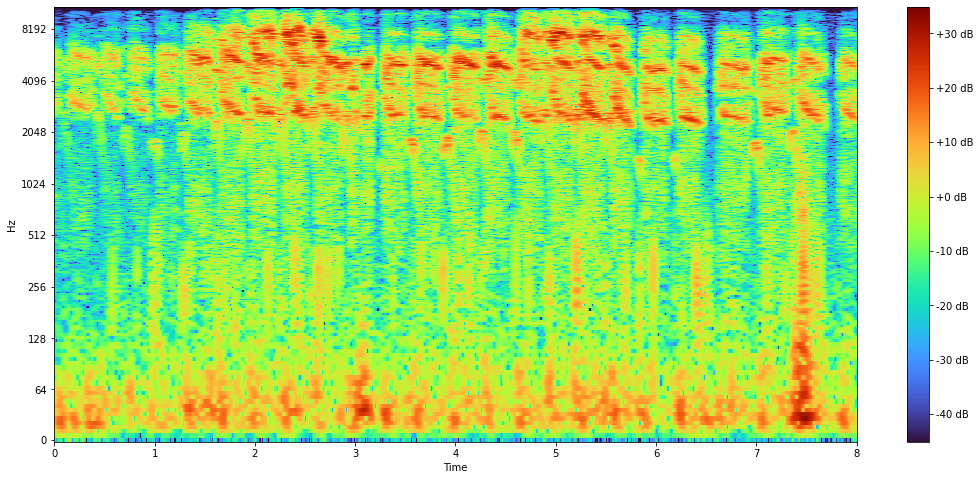

In [23]:
plot_stft(signal_h2s_s4,sr_h2s_s4,fft_window=4096,hop_size=256,y_axis='log',colormap='turbo')

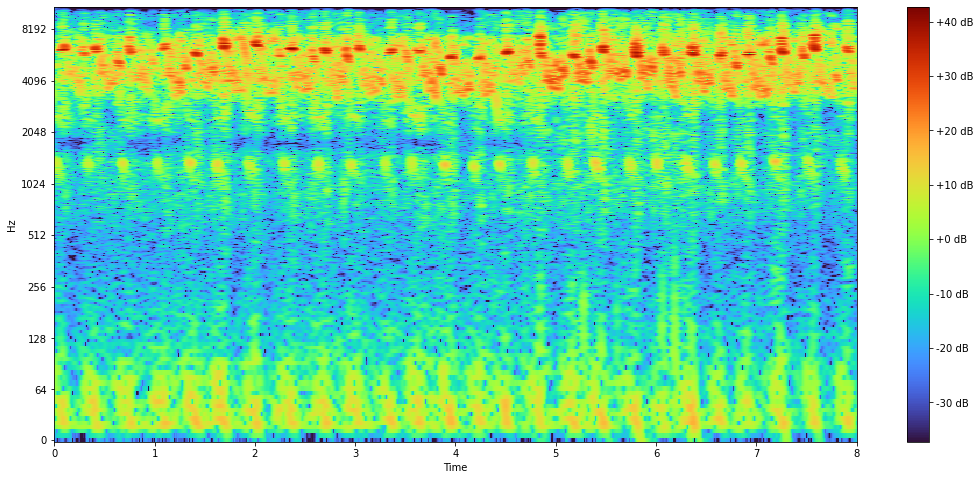

In [24]:
plot_stft(signal_p2s_s4,sr_p2s_s4,fft_window=4096,hop_size=256,y_axis='log',colormap='turbo')

### Spectral Centroid

In [ ]:
def spectral_centroid(signal,sr,fft_window,hop_size):
    SC = librosa.feature.spectral_centroid(y=signal,sr=sr,n_fft=fft_window,hop_length=hop_size)[0]
    return SC

In [ ]:
def plot_SC(signal,sr,fft_window,hop_size,color='g'):
    sc = spectral_centroid(signal,sr,fft_window,hop_size)
    t = librosa.frames_to_time(range(len(sc)),hop_length=hop_size)
    plt.figure(figsize=(22,10))
    plt.plot(t,sc,c=color)
    plt.show()
    return

In [ ]:
fft_window = 1024
hop_size = 512

In [ ]:
plot_SC(signal_bbe_4,sr=sr_bbe_4,fft_window=fft_window,hop_size=hop_size,color='b')

In [ ]:
plot_SC(signal_bbe_5,sr=sr_bbe_5,fft_window=fft_window,hop_size=hop_size,color='r')

In [ ]:
plot_SC(signal_bbe_1,sr=sr_bbe_1,fft_window=fft_window,hop_size=hop_size,color='y')

In [ ]:

plot_SC(signal_ghg_1,sr=sr_ghg_1,fft_window=fft_window,hop_size=hop_size)

### Spectral Bandwidth

In [ ]:
def s_bandwidth(signal,sr,fft_window,hop_size):
    sbw = librosa.feature.spectral_bandwidth(y=signal,sr=sr,n_fft=fft_window,hop_length=hop_size)[0]
    return sbw

In [ ]:
def plot_SBW(signal,sr,fft_window,hop_size,color='b'):
    sbw = s_bandwidth(signal,sr,fft_window,hop_size)
    t = librosa.frames_to_time(range(len(sbw)),hop_length=hop_size)
    plt.figure(figsize=(22,10))
    plt.plot(t,sbw,c=color)
    plt.show()
    return

In [ ]:
fft_window = 1024
hop_size = 512

In [ ]:
plot_SBW(signal_bbe_4,sr=sr_bbe_4,fft_window=fft_window,hop_size=hop_size)

In [ ]:
plot_SBW(signal_bbe_5,sr=sr_bbe_5,fft_window=fft_window,hop_size=hop_size,color='g')

In [ ]:
plot_SBW(signal_bbe_1,sr=sr_bbe_1,fft_window=fft_window,hop_size=hop_size,color='r')

In [ ]:
plot_SBW(signal_ghg_1,sr=sr_ghg_1,fft_window=fft_window,hop_size=hop_size)

### Band Energy Ratio

In [ ]:
# boundary frequency refers to the frequency we choose to define low and high frequencies.

def band_energy_ratio(signal,sr, boundary_freq=2000,fft_window=1024,hop_size=512):
    stft=librosa.stft(signal,n_fft=fft_window, hop_length=hop_size)# start with fourier transformation of original signal
    spec_power = np.abs(stft)**2                                   # calculate power of the spectrum: P = |fft|^2 
    freq_range = sr/2                                              # frequency range depends on sampling rate of the recording
    n_freq_bins = spec_power.shape[0]                              # number of bins in the frequency dimension
    freq_bin_size = freq_range/n_freq_bins                         # size of each bin in the frequency dimension
    boundary_freq_bin = int(np.floor(boundary_freq/freq_bin_size)) # bin #ID of the boundary frequency
    
    ber = []                                                       # initialise the array where we'll keep the ratio value for each time step
    for frame in spec_power.T:
        high_f = frame[boundary_freq_bin:].sum()
        low_f = frame[:boundary_freq_bin].sum()
        ber.append(low_f/high_f)
    return ber    

In [ ]:
## CHOOSE PARAMETER VALUES
boundary_freq = 3000
fft_window = 512
hop_size = 128

In [ ]:
def ber_plot(signal,sr,boundary_freq,fft_window,hop_size,ylim=1000,color='b'):
    ber = band_energy_ratio(signal,sr, boundary_freq,fft_window=fft_window,hop_size=hop_size)
    t = librosa.frames_to_time(range(len(ber)),hop_length=hop_size)
    plt.figure(figsize=(22,10))
    plt.plot(t,ber,c=color)
    plt.ylim((0, ylim))
    plt.show()
    return

In [ ]:
ber_plot(signal_h2b_s4_4,sr_h2b_s4_4,boundary_freq,fft_window,hop_size,color='xkcd:moss',ylim=100)

In [ ]:
ber_plot(signal_h2s_s4,sr_h2s_s4,boundary_freq,fft_window,hop_size,color='xkcd:cornflower blue',ylim=100)

In [ ]:
ber_plot(signal_p2s_s4,sr_p2s_s4,boundary_freq,fft_window,hop_size,color='xkcd:tangerine',ylim=100)

### Periodograms

In [ ]:
f, Pxx_den = scipy.signal.periodogram(signal_h2b_s4_4, sr_h2b_s4_4)
plt.figure(figsize=(18,8))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
f, Pxx_den = scipy.signal.periodogram(signal_h2s_s4, sr_h2s_s4)
plt.figure(figsize=(18,8))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [ ]:
f, Pxx_den = scipy.signal.periodogram(signal_p2s_s4, sr_p2s_s4)
plt.figure(figsize=(18,8))
plt.semilogy(f, Pxx_den)
plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

### Wavelets

In [ ]:
from kymatio.numpy import Scattering1D

In [ ]:
signal_ghg_1.shape[-1]

In [ ]:
J=10
Q=8
T=signal_p2s_s4.shape[-1]
#T=44100
wsr=Scattering1D(J, T, Q)(signal_p2s_s4/(np.max(np.abs(signal_p2s_s4))))

In [ ]:
meta = Scattering1D(J, T, Q).meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

print(wsr[order0].shape,wsr[order1].shape,wsr[order2].shape)

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(signal_p2s_s4)
plt.title('Original signal')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 1)
plt.plot(wsr[order0][0])
plt.title('Zeroth-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 2)
#plt.imshow(np.log(np.abs(wsr[order1])), aspect='auto',origin='lower',cmap='turbo')
plt.imshow(wsr[order1], aspect='auto',origin='lower',cmap='turbo')


plt.title('First-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 3)
plt.imshow(wsr[order2], aspect='auto', origin='lower',cmap='turbo')
plt.title('Second-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
im=wsr
plt.imshow(im,aspect='auto',origin='lower',cmap='turbo')


In [ ]:
J=10
Q=8
T=signal_h2b_s4_4.shape[-1]
#T=44100
wsr=Scattering1D(J, T, Q)(signal_h2b_s4_4)/(np.max(np.abs(signal_h2b_s4_4)))

In [ ]:
meta = Scattering1D(J, T, Q).meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

print(wsr[order0].shape,wsr[order1].shape,wsr[order2].shape)

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(signal_h2b_s4_4)
plt.title('Original signal')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 1)
plt.plot(wsr[order0][0])
plt.title('Zeroth-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 2)
#plt.imshow(np.log(np.abs(wsr[order1])), aspect='auto',origin='lower',cmap='turbo')
plt.imshow(wsr[order1], aspect='auto',origin='lower',cmap='turbo')


plt.title('First-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 3)
plt.imshow(wsr[order2], aspect='auto', origin='lower',cmap='turbo')
plt.title('Second-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#im=np.log((wsr[order2]))
im=wsr
plt.imshow(im,aspect='auto',origin='lower',cmap='turbo')

In [ ]:
J=10
Q=8
T=signal_h2s_s4.shape[-1]
#T=44100
wsr=Scattering1D(J, T, Q)(signal_h2s_s4)/np.max(np.abs(signal_h2s_s4))

In [ ]:
meta = Scattering1D(J, T, Q).meta()
order0 = np.where(meta['order'] == 0)
order1 = np.where(meta['order'] == 1)
order2 = np.where(meta['order'] == 2)

print(wsr[order0].shape,wsr[order1].shape,wsr[order2].shape)

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(signal_h2s_s4)
plt.title('Original signal')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 1)
plt.plot(wsr[order0][0])
plt.title('Zeroth-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 2)
#plt.imshow(np.log(np.abs(wsr[order1])), aspect='auto',origin='lower',cmap='turbo')
plt.imshow(wsr[order1], aspect='auto',origin='lower',cmap='turbo')


plt.title('First-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#plt.subplot(3, 1, 3)
plt.imshow(wsr[order2], aspect='auto', origin='lower',cmap='turbo')
plt.title('Second-order scattering')

In [ ]:
plt.figure(figsize=(18, 8))
#im=np.log((wsr[order2]))
im=wsr
plt.imshow(im,aspect='auto',origin='lower',cmap='turbo')